
# American Census

In [167]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import matplotlib.pyplot as plt
import plotly.express as px

## Global config

In [168]:
# Data config
path_to_csv = "adult.csv"

## Load data

In [169]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

X_test = pd.read_csv("X_test.csv")


## Helpers

In [170]:
# TODO

## Data exploration

### Question 1

In [171]:
X_train.describe()

,age,education-num,hours-per-week
count,16280.000000,16040.00000,16280.000000
mean,38.600614,10.09414,40.392936
std,13.695138,2.55840,12.345950
min,17.000000,1.00000,1.000000
25%,28.000000,9.00000,40.000000
50%,37.000000,10.00000,40.000000
75%,48.000000,12.00000,45.000000
max,90.000000,16.00000,99.000000


In [172]:


# TODO
#print(X_train.head())
#print(y_train.head())

hours_per_week = ['hours-per-week']
education_num = ['education-num']


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

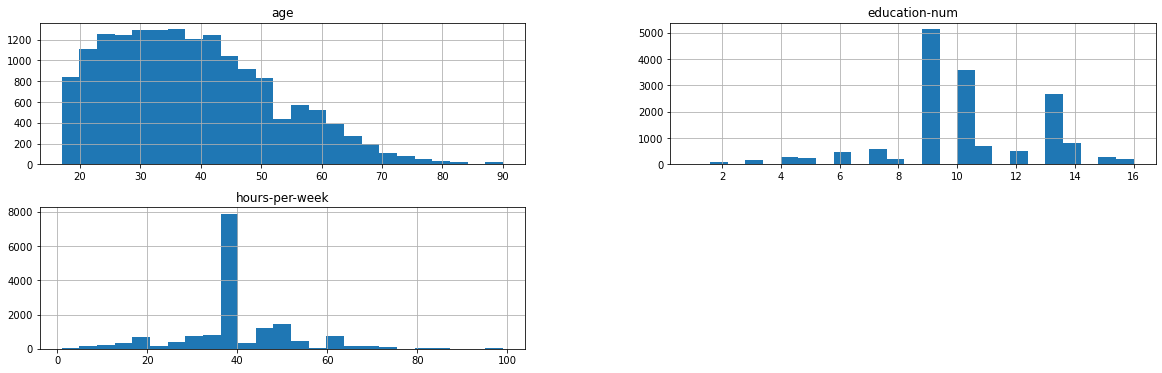

In [173]:
#The distribution of our dataset
X_train.hist(bins = 25, figsize = (20, 6))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

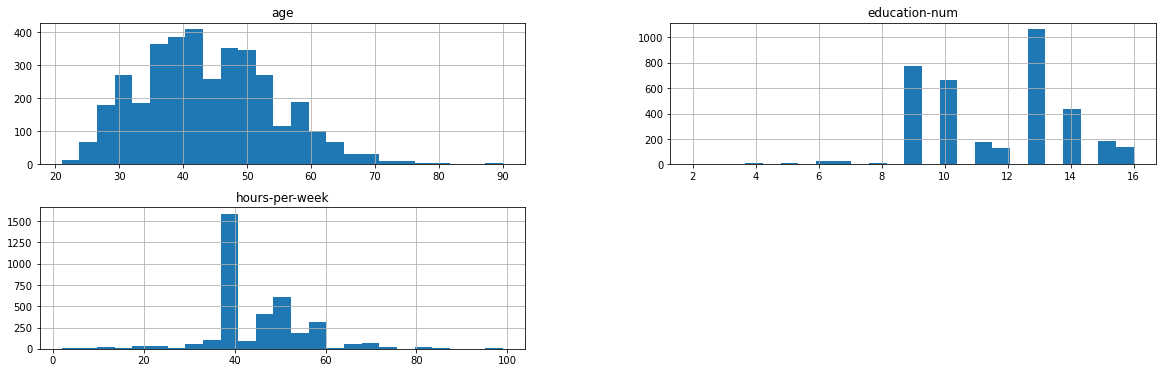

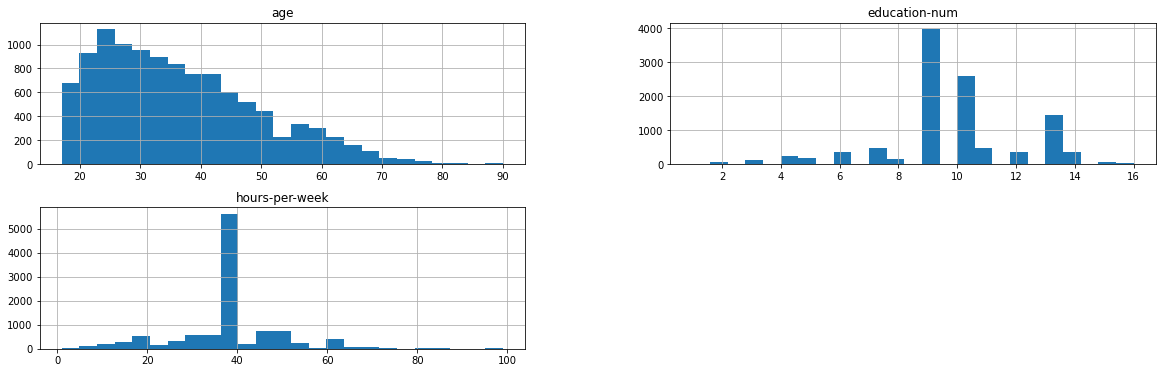

In [174]:
#Salary bigger than 50k
X_train1 = X_train.where(y_train.salary == 1)
X_train1 = X_train1.dropna(axis = 0)
X_train1.hist(bins = 25, figsize = (20, 6))

#Salary smaller than 50k
X_train2 = X_train.where(y_train.salary == 0)
X_train2 = X_train2.dropna(axis = 0)
X_train2.hist(bins = 25, figsize = (20, 6))


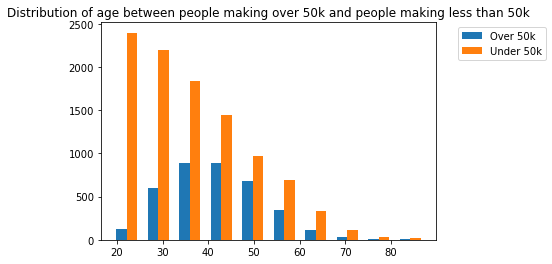

In [175]:
#Distribution of age between people making over 50k and people making less than 50k
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(X_train1.age)
b_heights, b_bins = np.histogram(X_train2.age, bins = a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width = width, label = 'Over 50k')
ax.bar(b_bins[:-1]+width, b_heights, width = width, label = 'Under 50k')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.title.set_text("Distribution of age between people making over 50k and people making less than 50k")

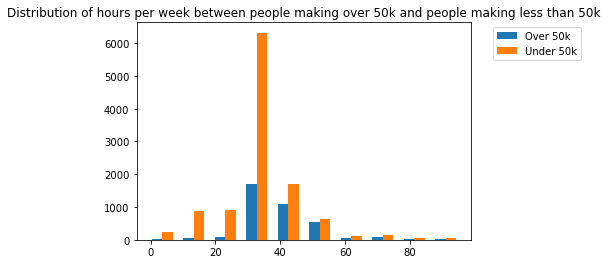

In [176]:
#Distribution of hours per week between people making over 50k and people making less than 50k
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(X_train1['hours-per-week'])
b_heights, b_bins = np.histogram(X_train2['hours-per-week'], bins = a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width = width, label = 'Over 50k')
ax.bar(b_bins[:-1]+width, b_heights, width = width, label = 'Under 50k')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.title.set_text("Distribution of hours per week between people making over 50k and people making less than 50k")

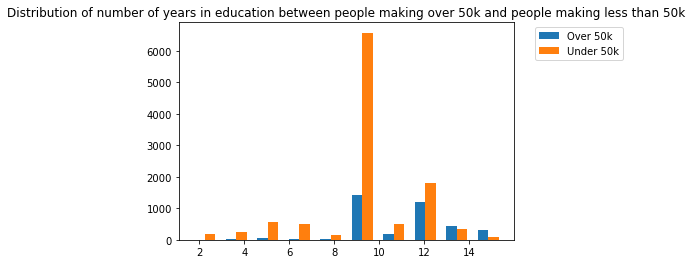

In [177]:
#Distribution of number of years in education between people making over 50k and people making less than 50k
fig, ax = plt.subplots()
a_heights, a_bins = np.histogram(X_train1['education-num'])
b_heights, b_bins = np.histogram(X_train2['education-num'], bins = a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width = width, label = 'Over 50k')
ax.bar(b_bins[:-1]+width, b_heights, width = width, label = 'Under 50k')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
ax.title.set_text("Distribution of number of years in education between people making over 50k and people making less than 50k")

In [178]:
#As you can see, there are a lot more people who make under 50k per year, than people who make more than 50k
#This means that our dataset is inbalanced and we need to choose a classification metrics that takes into...
#...account this aspect. For example we could use a 'balanced accuracy_score' or 'MCC'

### Question 2

       age  education-num  hours-per-week     workclass      education  \
0       30            9.0              40       Private        HS-grad   
1       77           10.0               6           NaN   Some-college   
2       44           12.0              50       Private     Assoc-acdm   
3       53           10.0              50       Private   Some-college   
4       41           10.0              40   Federal-gov   Some-college   
...    ...            ...             ...           ...            ...   
16275   31           11.0              30       Private      Assoc-voc   
16276   37           13.0              40     State-gov      Bachelors   
16277   45           14.0              40     State-gov        Masters   
16278   32            9.0              40       Private        HS-grad   
16279   58            7.0              50       Private           11th   

            marital-status          occupation    relationship  \
0       Married-civ-spouse               Sale

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

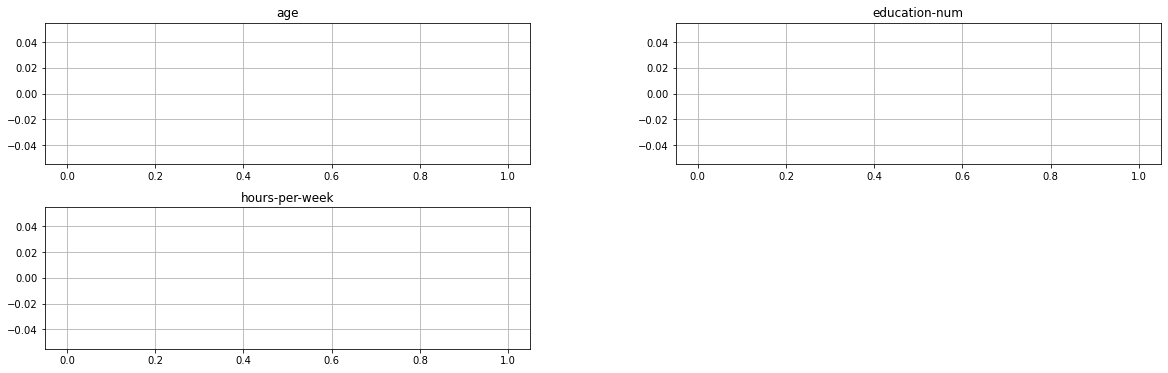

In [179]:
# TODO
X_train_male = X_train.where(X_train.sex == 'Male')
print(X_train)
print(X_train_male)
X_train_male = X_train_male.dropna(axis = 0)

X_train_male.hist(bins = 25, figsize = (20, 6))

## Data exploration

### Question 1

In [180]:
# TODO
#Before we do the pre-processing we want to combine X_train and y_train such that every change that we do to X_train will also apply to y_train
X_train['salary'] = y_train
print("A list with the total missing values in the dataframe:\n" + str(X_train.isnull().sum()))
print("The size of the dataset is", len(X_train))
#Since by introducing the native-country as a feature, we will most likely introduce bias in our data set, we will
#ignore the missing values from the native_country
native_country = X_train['native-country']
X_train = X_train.drop(columns = ['native-country'])
X_test = X_test.drop(columns = ['native-country'])
X_train.dropna(inplace = True)
X_test.dropna(inplace = True)
print("A list with the total missing values in the dataframe:\n" + str(X_train.isnull().sum()))
print("The size of the dataset is", len(X_train))

A list with the total missing values in the dataframe:
age                  0
education-num      240
hours-per-week       0
workclass          936
education            0
marital-status       0
occupation        1181
relationship         0
race                 0
sex                  0
native-country     300
salary               0
dtype: int64
The size of the dataset is 16280
A list with the total missing values in the dataframe:
age               0
education-num     0
hours-per-week    0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
salary            0
dtype: int64
The size of the dataset is 14988


### Question 2

In [181]:
# TODO
#We already droped native-country because of introducing bias
#Relationship will also introduce bias so, we don't need to preprocess that part(e.g. "wife", "husband" can determine the sex)
#Same for race and sex
#I don't believe that the marital-status has anything to do with the income of a person, so we won't preprocess that either
#Education can also be reflected in education-num which is already a numerical feature.

#Now we drop all the columns that we don't use and assign them to separate variables
relationship = X_train['relationship']
race = X_train['race']
sex = X_train['sex']
marital_status = X_train['marital-status']
education = X_train['education']

dropColumns = ['relationship', 'race', 'sex', 'marital-status','education']
X_train.drop(columns = dropColumns, inplace = True)
X_test.drop(columns = dropColumns, inplace = True)



In [182]:
X_train.head()

,age,education-num,hours-per-week,workclass,occupation,salary
0,30,9.0,40,Private,Sales,0
2,44,12.0,50,Private,Prof-specialty,0
3,53,10.0,50,Private,Adm-clerical,1
4,41,10.0,40,Federal-gov,Transport-moving,1
5,50,14.0,50,Private,Prof-specialty,1


In [183]:
#Thus we only need to pre-process workclass and occupation.
#Preprocessing of workclass
encoder = preprocessing.OneHotEncoder()
workclass = encoder.fit_transform(X_train['workclass'].to_numpy().reshape(-1, 1)).toarray()
workclass_columns = ['workclass0', 'workclass1', 'workclass2', 'workclass3', 'workclass4', 'workclass5', 'workclass6']
workclass_df = pd.DataFrame(workclass, columns = workclass_columns)
X_train_encoded = X_train.copy()
X_train_encoded.drop(columns = ['workclass'], inplace = True)
X_train_encoded = pd.concat([X_train_encoded, workclass_df], axis = 1, join = 'inner')

workclass_test = encoder.fit_transform(X_test['workclass'].to_numpy().reshape(-1, 1)).toarray()
workclass_df_test = pd.DataFrame(workclass_test, columns = workclass_columns)
X_test.drop(columns = ['workclass'], inplace = True)
X_test = pd.concat([X_test, workclass_df_test], axis = 1, join = 'inner')

X_train_encoded

,age,education-num,hours-per-week,occupation,salary,workclass0,workclass1,workclass2,workclass3,workclass4,workclass5,workclass6
0,30,9.0,40,Sales,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,44,12.0,50,Prof-specialty,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,10.0,50,Adm-clerical,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,41,10.0,40,Transport-moving,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,50,14.0,50,Prof-specialty,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14983,48,13.0,40,Prof-specialty,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14984,40,14.0,40,Exec-managerial,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14985,25,6.0,40,Machine-op-inspct,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14986,50,7.0,40,Other-service,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [184]:
#Preprocessing of occupation
occupation = encoder.fit_transform(X_train['occupation'].to_numpy().reshape(-1, 1)).toarray()
occupation_columns = []
for i in range(occupation.shape[1]):
    occupation_columns.append("occupation" + str(i))
occupation_df = pd.DataFrame(occupation, columns = occupation_columns)
X_train_encoded.drop(columns = 'occupation', inplace = True)
X_train_encoded = pd.concat([X_train_encoded, occupation_df], axis = 1, join = 'inner')
X_train_encoded.reset_index(drop = True, inplace = True)

occupation_test = encoder.fit_transform(X_test['occupation'].to_numpy().reshape(-1, 1)).toarray()
occupation_df_test = pd.DataFrame(occupation_test, columns = occupation_columns)
X_test.drop(columns = 'occupation', inplace = True)
X_test = pd.concat([X_test, occupation_df_test], axis = 1, join = 'inner')
X_test.reset_index(drop = True, inplace = True)

X_train_encoded

,age,education-num,hours-per-week,salary,workclass0,workclass1,workclass2,workclass3,workclass4,workclass5,...,occupation4,occupation5,occupation6,occupation7,occupation8,occupation9,occupation10,occupation11,occupation12,occupation13
0,30,9.0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44,12.0,50,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,10.0,50,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,41,10.0,40,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,50,14.0,50,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,48,13.0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13807,40,14.0,40,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13808,25,6.0,40,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13809,50,7.0,40,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Question 3

<AxesSubplot:>

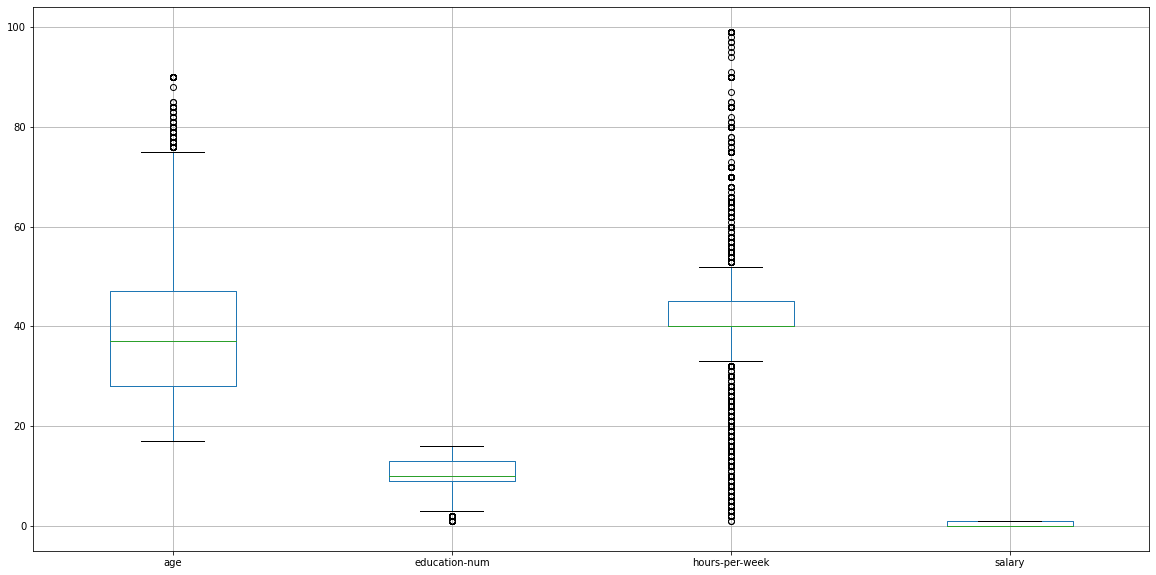

In [185]:
# TODO
#Here I standardize the dataset
X_train.boxplot(figsize = (20, 10))

In [186]:
#As you can see, our data contains a couple of outliers for the age and a lot of outliers for hours-per-week, for this reason
#we will use the RobustScaler for scaling our data.
scaleColumns = ['age', 'education-num', 'hours-per-week']
X_scaled = X_train_encoded[scaleColumns]
scaler = preprocessing.RobustScaler()
scaler.fit(X_scaled)
X_scaled = pd.DataFrame(scaler.transform(X_scaled), columns = scaleColumns)
X_train_encoded[scaleColumns] = X_scaled

X_test_scaled = X_test[scaleColumns]
scaler.fit(X_test_scaled)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_scaled), columns = scaleColumns)
X_test[scaleColumns] = X_test_scaled

X_train_encoded

,age,education-num,hours-per-week,salary,workclass0,workclass1,workclass2,workclass3,workclass4,workclass5,...,occupation4,occupation5,occupation6,occupation7,occupation8,occupation9,occupation10,occupation11,occupation12,occupation13
0,-0.368421,-0.25,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.368421,0.50,2.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.842105,0.00,2.0,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.210526,0.00,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.684211,1.00,2.0,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13806,0.578947,0.75,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13807,0.157895,1.00,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
13808,-0.631579,-1.00,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13809,0.684211,-0.75,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
#Other than that, I dropped the columns that I do not use in my program. This was done before pre-processing

## Experiments

### Question 1

In [22]:
# TODO
from sklearn.model_selection import train_test_split
#Here we do the train_test_split
#But before we do the split, we have to separate the salary from the dataframe
y_train_final = X_train_encoded['salary']
X_train_final = X_train_encoded.drop(columns = ['salary'])


train_X, test_X, train_y, test_y = train_test_split(X_train_final, y_train_final,
                                                                test_size = 0.2, random_state = 0)

In [23]:
#Now we create our models with the default hyper-parameters
models = {
    'gaussianClassifier' : GaussianNB(),
    'knnClassifier' : KNeighborsClassifier(n_neighbors = 3, weights = "distance"),
    'logisticRegressionClassifier' : LogisticRegression(C = 10, penalty = "none", random_state = 42),
    'svcClassifier' : SVC(C = 10, kernel = "poly", random_state = 42),
    'decisionTreeClassifier' : DecisionTreeClassifier(max_depth = None, min_samples_leaf = 2, random_state = 42)
}

### Question 2

In [126]:
# TODO
#Here we fit and test the data
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
testScores = []
for name, model in models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    testScores.append(matthews_corrcoef(test_y, predictions))
print(testScores)


C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.09652615311195145, 0.24908983256616055, 0.3707299228813516, 0.36279481277877174, 0.24211070259450038]


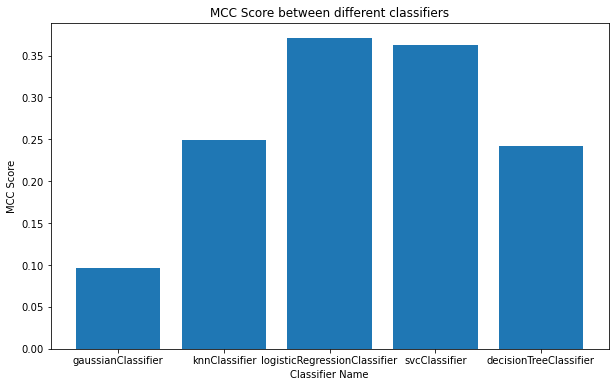

In [25]:

plt.figure(figsize = (10, 6))
plt.bar(models.keys(), testScores)
plt.title("MCC Score between different classifiers")
plt.ylabel('MCC Score')
plt.xlabel('Classifier Name')
plt.show()

### Question 3

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO
#Since the Gaussian Classifier has not hyperparameters, we don't do hyperparameters tuning for that
#Since we have way more people making under 50k per year than we have making over 50k per year, we will...
#... use a stratified k-fold, such that the relative class frequencies is approximately preserved in...
#...each train and validation fold.

#Now we perform hyper-parameter tuning for k Nearest Neighbor

param_grid = [{'n_neighbors' : np.arange(1, 150, 10), 'weights' : ['distance']},
                                {'n_neighbors' : np.arange(1, 150, 10), 'weights' : ['uniform']}]
score_function = make_scorer(matthews_corrcoef)

model = KNeighborsClassifier()
cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 1)
clfKnn = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function, n_jobs = -1,
                  cv = cv)
clfKnn.fit(train_X, train_y)
#scores = cross_val_score(model, train_X, train_y, scoring = 'matthews_corrcoef', cv = cv, n_jobs = -1)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141]),
                          'weights': ['distance']},
                         {'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141]),
                          'weights': ['uniform']}],
             scoring=make_scorer(matthews_corrcoef))

[1 11 21 31 41 51 61 71 81 91 101 111 121 131 141]
[0.21475649 0.26904399 0.2751982  0.27434151 0.27119693 0.26774471
 0.26477995 0.26519834 0.26351441 0.2620514  0.26109418 0.26132746
 0.25798927 0.25354021 0.25125741]
[1 11 21 31 41 51 61 71 81 91 101 111 121 131 141]
[0.21475649 0.26904399 0.2751982  0.27434151 0.27119693 0.26774471
 0.26477995 0.26519834 0.26351441 0.2620514  0.26109418 0.26132746
 0.25798927 0.25354021 0.25125741]


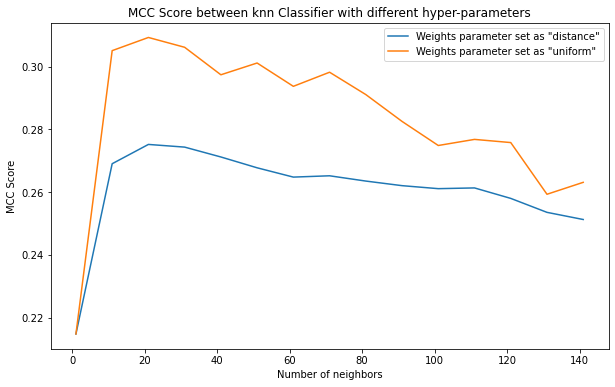

Best hyper-parameters are {'n_neighbors': 21, 'weights': 'uniform'}


In [27]:

#print(clf.cv_results_)
params_Used_distance = clfKnn.cv_results_.get('param_n_neighbors')[:15]
params_Used_uniform = clfKnn.cv_results_.get('param_n_neighbors')[15:]
mean_test_scores_distance = clfKnn.cv_results_.get('mean_test_score')[:15]
mean_test_scores_uniform = clfKnn.cv_results_.get('mean_test_score')[15:]
print(params_Used_distance)
print(mean_test_scores_distance)
print(params_Used_uniform)
print(mean_test_scores_distance)


plt.figure(figsize = (10, 6))
plt.plot(list(params_Used_distance), list(mean_test_scores_distance), label = 'Weights parameter set as "distance"')
plt.plot(list(params_Used_uniform), list(mean_test_scores_uniform), label = 'Weights parameter set as "uniform"')
#plt.plot(params_Used_distance, interpolated(params_Used_distance))
#plt.plot([1.5, 2, 3], [1, 1, 2])
plt.title("MCC Score between knn Classifier with different hyper-parameters")
plt.ylabel('MCC Score')
plt.xlabel('Number of neighbors')
plt.legend(loc = 'best')
plt.show()

print('Best hyper-parameters are', clfKnn.best_params_)

In [28]:
#As you can see from the graph, the best 'weights' is constantly 'uniform', and the best k varies between...
#... 11 and 31.
#Now we do another gridSearch for values between 10 and 30.
param_grid = [{'n_neighbors' : np.arange(10, 31), 'weights' : ['uniform']}]
clfKnn1 = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function , n_jobs = -1,
                  cv = cv)
clfKnn1.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30]),
                          'weights': ['uniform']}],
             scoring=make_scorer(matthews_corrcoef))

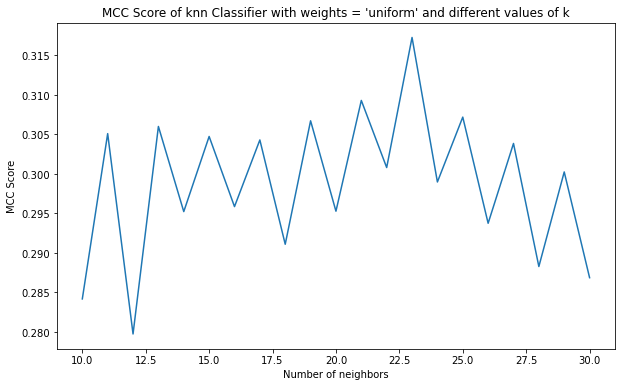

Best set of hyper-parameters for knn is {'n_neighbors': 23, 'weights': 'uniform'}


In [29]:
param_Used = clfKnn1.cv_results_.get('param_n_neighbors')
mean_test_scores = clfKnn1.cv_results_.get('mean_test_score')

plt.figure(figsize = (10, 6))
plt.plot(list(param_Used), list(mean_test_scores))
plt.title("MCC Score of knn Classifier with weights = 'uniform' and different values of k")
plt.ylabel('MCC Score')
plt.xlabel('Number of neighbors')
plt.show()
print('Best set of hyper-parameters for knn is', clfKnn1.best_params_)

In [30]:
#Now we perform our hyper-parameter tuning on LogisticRegression
param_grid = [{'C' : [.001, .01, .1, 1, 10], 'penalty' : ['none']},
              {'C' : [.001, .01, .1, 1, 10], 'penalty' : ['l2']},
              {'C' : [.001, .01, .1, 1, 10], 'penalty' : ['l1']}]
model = LogisticRegression(solver = 'saga', random_state = 42)
clfLogisticRegression = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfLogisticRegression.fit(train_X, train_y)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['none']},
                         {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1']}],
             scoring=make_scorer(matthews_corrcoef))

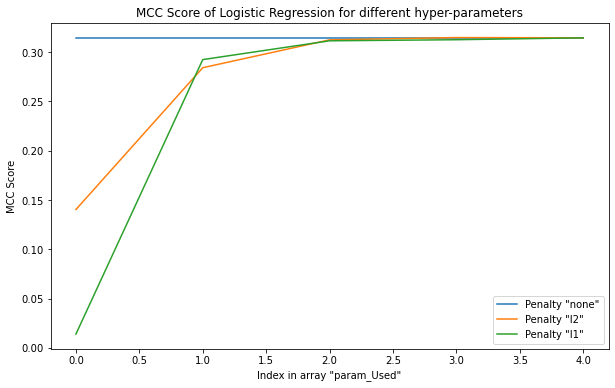

Best set of hyper-parameters for Logistic Regression is {'C': 1, 'penalty': 'l2'}


In [31]:
#print(clfLogisticRegression.cv_results_)
param_Used = clfLogisticRegression.cv_results_.get('param_C')[:5]
mean_test_scores = []
for i in range(3):
    mean_test_scores.append(clfLogisticRegression.cv_results_.get('mean_test_score')[5*i:(5 + 5*i)])

plt.figure(figsize = (10, 6))
plt.plot(list(mean_test_scores[0]), label = 'Penalty "none"')
plt.plot(list(mean_test_scores[1]), label = 'Penalty "l2"')
plt.plot(list(mean_test_scores[2]), label = 'Penalty "l1"')
plt.title("MCC Score of Logistic Regression for different hyper-parameters")
plt.ylabel('MCC Score')
plt.xlabel('Index in array "param_Used"')
plt.legend(loc = 'best')
plt.show()
print('Best set of hyper-parameters for Logistic Regression is', clfLogisticRegression.best_params_)

In [190]:
print(clfLogisticRegression.cv_results_)

{'mean_fit_time': array([1.26788175, 1.18116384, 1.32709863, 1.434724  , 1.28380437,
       0.12972887, 0.14283049, 0.66412561, 1.07472632, 1.38301773,
       0.17043653, 0.13744562, 0.16883733, 0.93250978, 1.07604234]), 'std_fit_time': array([0.46984097, 0.29555377, 0.32652661, 0.43412685, 0.25119123,
       0.02556837, 0.02103245, 0.07484248, 0.29199601, 0.48651454,
       0.03109115, 0.03433681, 0.02344367, 0.29196098, 0.28674106]), 'mean_score_time': array([0.01010265, 0.00410144, 0.00750151, 0.00780222, 0.00755258,
       0.0040005 , 0.00700402, 0.01885505, 0.00360096, 0.00510137,
       0.00380075, 0.00478585, 0.0043009 , 0.00450075, 0.00420108]), 'std_score_time': array([0.01449823, 0.00070014, 0.00988424, 0.01076177, 0.01099269,
       0.00044686, 0.00868022, 0.02353491, 0.00049003, 0.00311396,
       0.00074858, 0.00147961, 0.00090056, 0.00196243, 0.00040059]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 0.001, 0.01, 0.1, 1, 10,
                   0.001, 0.01, 0.1, 

In [32]:
param_grid = [{'C' : [.1, .5, 1, 2, 3, 4, 5], 'penalty' : ['none']},
              {'C' : [.1, .5, 1, 2, 3, 4, 5], 'penalty' : ['l2']},
              {'C' : [.1, .5, 1, 2, 3, 4, 5], 'penalty' : ['l1']}]
clfLogisticRegression1 = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfLogisticRegression1.fit(train_X, train_y)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=LogisticRegression(random_state=42, solver='saga'),
             n_jobs=-1,
             param_grid=[{'C': [0.1, 0.5, 1, 2, 3, 4, 5], 'penalty': ['none']},
                         {'C': [0.1, 0.5, 1, 2, 3, 4, 5], 'penalty': ['l2']},
                         {'C': [0.1, 0.5, 1, 2, 3, 4, 5], 'penalty': ['l1']}],
             scoring=make_scorer(matthews_corrcoef))

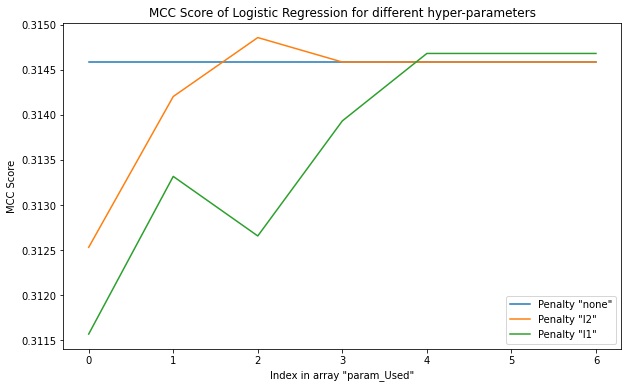

Best set of hyper-parameters for Logistic Regression is {'C': 1, 'penalty': 'l2'}


In [33]:
param_Used = clfLogisticRegression1.cv_results_.get('param_C')[:7]
mean_test_scores = []
for i in range(3):
    mean_test_scores.append(clfLogisticRegression1.cv_results_.get('mean_test_score')[7*i:(7 + 7*i)])

plt.figure(figsize = (10, 6))
plt.plot(list(mean_test_scores[0]), label = 'Penalty "none"')
plt.plot(list(mean_test_scores[1]), label = 'Penalty "l2"')
plt.plot(list(mean_test_scores[2]), label = 'Penalty "l1"')
plt.title("MCC Score of Logistic Regression for different hyper-parameters")
plt.ylabel('MCC Score')
plt.xlabel('Index in array "param_Used"')
plt.legend(loc = 'best')
plt.show()
print('Best set of hyper-parameters for Logistic Regression is', clfLogisticRegression1.best_params_)
#As you can see from the graph, the differences are really small, so there's no need in continuing with...
#hyper-parameter tuning

In [34]:
#Now we perform hyper-parameter tuning for Support Vector Machines
param_grid = [{'C' : [.01, .1, 1, 10, 100], 'kernel' : ['linear']},
              {'C' : [.01, .1, 1, 10, 100], 'kernel' : ['poly']},
              {'C' : [.01, .1, 1, 10, 100], 'kernel' : ['rbf']},
              {'C' : [.01, .1, 1, 10, 100], 'kernel' : ['sigmoid']}]
model = SVC(random_state = 42)
clfSVC = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfSVC.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['poly']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['sigmoid']}],
             scoring=make_scorer(matthews_corrcoef))

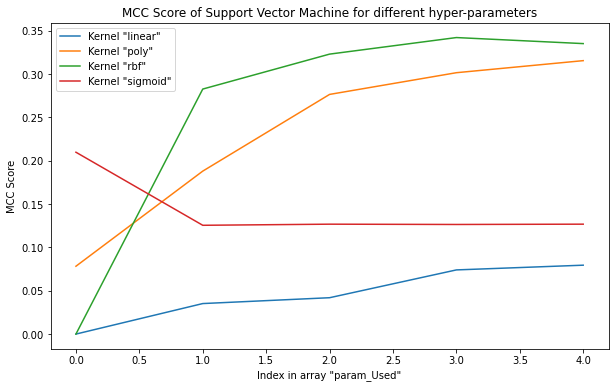

Best set of hyper-parameters for SVM is {'C': 10, 'kernel': 'rbf'}


In [43]:
param_Used = clfSVC.cv_results_.get('param_C')[:5]
mean_test_scores = []
for i in range(4):
    mean_test_scores.append(clfSVC.cv_results_.get('mean_test_score')[5*i:(5 + 5*i)])
plt.figure(figsize = (10, 6))
plt.plot(list(mean_test_scores[0]), label = 'Kernel "linear"')
plt.plot(list(mean_test_scores[1]), label = 'Kernel "poly"')
plt.plot(list(mean_test_scores[2]), label = 'Kernel "rbf"')
plt.plot(list(mean_test_scores[3]), label = 'Kernel "sigmoid"')
plt.title("MCC Score of Support Vector Machine for different hyper-parameters")
plt.ylabel('MCC Score')
plt.xlabel('Index in array "param_Used"')
plt.legend(loc = 'best')
plt.show()
print('Best set of hyper-parameters for SVM is', clfSVC.best_params_)
#Continue with poly and rbf for bigger values

In [41]:
param_grid = [{'C' : [50, 80, 100, 120, 150], 'kernel' : ['rbf']},
              {'C' : [50, 80, 100, 120, 150], 'kernel' : ['poly']}]
clfSVC1 = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfSVC1.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [50, 80, 100, 120, 150], 'kernel': ['rbf']},
                         {'C': [50, 80, 100, 120, 150], 'kernel': ['poly']}],
             scoring=make_scorer(matthews_corrcoef))

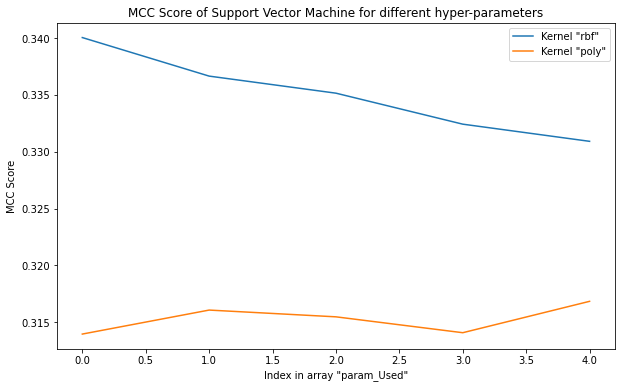

Best set of hyper-parameters for SVM is {'C': 10, 'kernel': 'rbf'}


In [45]:
param_Used = clfSVC1.cv_results_.get('param_C')[:5]
mean_test_scores = [clfSVC1.cv_results_.get('mean_test_score')[:5], clfSVC1.cv_results_.get('mean_test_score')[5:]]
plt.figure(figsize = (10, 6))
plt.plot(list(mean_test_scores[0]), label = 'Kernel "rbf"')
plt.plot(list(mean_test_scores[1]), label = 'Kernel "poly"')
plt.title("MCC Score of Support Vector Machine for different hyper-parameters")
plt.ylabel('MCC Score')
plt.xlabel('Index in array "param_Used"')
plt.legend(loc = 'best')
plt.show()
print('Best set of hyper-parameters for SVM is', clfSVC1.best_params_)

In [46]:
param_grid = [{'C' : [10, 20, 30, 40, 50], 'kernel' : ['rbf']}]
clfSVC2 = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfSVC2.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid=[{'C': [10, 20, 30, 40, 50], 'kernel': ['rbf']}],
             scoring=make_scorer(matthews_corrcoef))

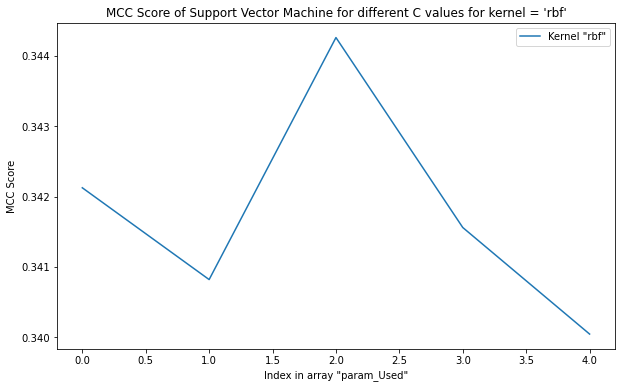

Best set of hyper-parameters for SVM is {'C': 30, 'kernel': 'rbf'}


In [48]:
param_Used = clfSVC2.cv_results_.get('param_C')
mean_test_scores = clfSVC2.cv_results_.get('mean_test_score')
plt.figure(figsize = (10, 6))
plt.plot(list(mean_test_scores), label = 'Kernel "rbf"')
plt.title("MCC Score of Support Vector Machine for different C values for kernel = 'rbf'")
plt.ylabel('MCC Score')
plt.xlabel('Index in array "param_Used"')
plt.legend(loc = 'best')
plt.show()
print('Best set of hyper-parameters for SVM is', clfSVC2.best_params_)

In [78]:
#Now we perform hyper-parameter tuning for Decision Trees
param_grid = [{'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'min_samples_leaf' : [2, 4, 6, 8, 10]},
             {'max_depth' : [None], 'min_samples_leaf' : [2, 4, 6, 8, 10]}]
model = DecisionTreeClassifier(random_state = 42)
clfDecisionTree = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfDecisionTree.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                          'min_samples_leaf': [2, 4, 6, 8, 10]},
                         {'max_depth': [None],
                          'min_samples_leaf': [2, 4, 6, 8, 10]}],
             scoring=make_scorer(matthews_corrcoef))

In [80]:
#print(clfDecisionTree.cv_results_)
print('Best parameter for the first iteration', clfDecisionTree.best_params_)

Best parameter for the first iteration {'max_depth': 10, 'min_samples_leaf': 10}


In [83]:
param_grid = [{'max_depth' : [5, 7, 9, 10, 11, 13, 15], 'min_samples_leaf' : [2, 4, 6, 8, 10]}]
clfDecisionTree1 = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfDecisionTree1.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [5, 7, 9, 10, 11, 13, 15],
                          'min_samples_leaf': [2, 4, 6, 8, 10]}],
             scoring=make_scorer(matthews_corrcoef))

In [87]:
print('Best parameter for the 2nd iteration', clfDecisionTree1.best_params_)
#print(clfDecisionTree1.cv_results_)

Best parameter for the 2nd iteration {'max_depth': 5, 'min_samples_leaf': 4}


In [89]:
param_grid = [{'max_depth' : np.arange(1, 21), 'min_samples_leaf' : np.arange(1,20)}]
clfDecisionTree2 = GridSearchCV(estimator = model, param_grid = param_grid, scoring = score_function,
                                   n_jobs = -1, cv = cv)
clfDecisionTree2.fit(train_X, train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                          'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
             scoring=make_scorer(matthews_corrcoef))

In [94]:
print('Best parameter for the 3rd iteration', clfDecisionTree2.best_params_)
print('Best score was', clfDecisionTree2.best_score_)
#As you can see, throughout the 3 iterations, the high values for the model have consistently performed...
#... worse than the low values. Therefore, we don't need to test for values higher than what we've...
#... already tested for.Thus we can conclude that the best_params we've found so far will give us the...
#... best DecisionTreeModel

Best parameter for the 3rd iteration {'max_depth': 6, 'min_samples_leaf': 5}
Best score was 0.3800064696511868


### Question 4

In [107]:
tuned_models = {
    'gaussianClassifier' : GaussianNB(),
    'knnClassifier' : KNeighborsClassifier(n_neighbors = 23, weights = "uniform"),
    'logisticRegressionClassifier' : LogisticRegression(C = 1, penalty = "l2", random_state = 42, solver = 'saga'),
    'svcClassifier' : SVC(C = 10, kernel = "rbf", random_state = 42),
    'decisionTreeClassifier' : DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 5, random_state = 42)
}

In [125]:
testScores_tuned = []
for name, model in tuned_models.items():
    model.fit(train_X, train_y)
    predictions = model.predict(test_X)
    testScores_tuned.append(matthews_corrcoef(test_y, predictions))
print(testScores_tuned)

C:\Users\oprea\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[0.09652615311195145, 0.3492639032250405, 0.3717917009563467, 0.3492386564947812, 0.3838980210764095]


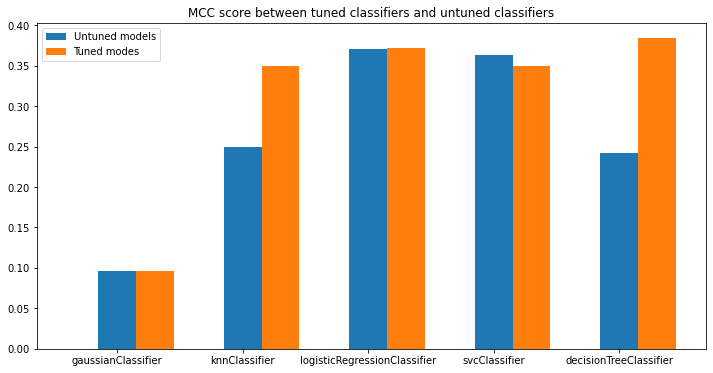

In [191]:
#TODO

# plt.figure(figsize = (10, 6))
# plt.bar(models.keys(), testScores)
# plt.bar(tuned_models.keys(), testScores_tuned)
# plt.title("MCC Score between different classifiers")
# plt.ylabel('MCC Score')
# plt.xlabel('Classifier Name')
# plt.show()

fig, ax = plt.subplots()
# a_heights, a_bins = np.histogram(testScores)
# b_heights, b_bins = np.histogram(testScores_tuned, bins = a_bins)

width = 0.3
x_testScores = [0, 1, 2, 3, 4]
x_testScores_tuned = [0.3, 1.3, 2.3, 3.3, 4.3]
fig.set_figwidth(12)
fig.set_figheight(6)
ax.bar(x_testScores, testScores, width = width, label = 'Untuned models')
ax.bar(x_testScores_tuned, testScores_tuned, width = width, label = 'Tuned modes')
ax.set_title('MCC score between tuned classifiers and untuned classifiers')
ax.bar(models.keys(), 0)
ax.legend(loc = 'best')
plt.show()
# ax.bar(b_bins[:-1]+width, b_heights, width = width, label = 'Under 50k')
# ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# ax.title.set_text("Distribution of number of years in education between people making over 50k and people making less than 50k")

### Question 5

In [189]:
#TODO
#Now since we've seen that the DecisionTreeClassifier performs best, we can use the entire data...
#... for training before submitting the entire predictions

finalModel = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 5, random_state = 42)
finalModel.fit(X_train_final, y_train_final)

prediction = finalModel.predict(X_test) # TODO replace this with you own prediction
pd.DataFrame(prediction).to_csv("GROUP_classes_problem_census.txt", index=False, header=False)